# Научная графика в Python

Автор: Шабанов Павел Александрович

E-mail: pa.shabanov@gmail.com

URL: [Заметки по программированию в науках о Земле](http://progeoru.blogspot.ru/)

Дата последнего обновления: 12.03.2017

In [1]:
# Преамбула
%matplotlib inline

import os
import matplotlib.pyplot as plt
from matplotlib import rcParams

import numpy as np

def save(name='', fmt='png'):
    pwd = os.getcwd()
    iPath = './pictures/{}'.format(fmt)
    if not os.path.exists(iPath):
        os.mkdir(iPath)
    os.chdir(iPath)
    plt.savefig('{}.{}'.format(name, fmt), fmt='png')
    os.chdir(pwd)
    #plt.close()

rcParams['font.family'] = 'fantasy'
rcParams['font.fantasy'] = 'Arial'

## Глава 13 Цветовая шкала

### Содержание главы

1. Цветовая шкала colorbar;

2. Подпись цветовой шкалы;

3. Положение цветовой шкалы на области рисования;

4. Деления цветовой шкалы;

5. Особенности в отображении цветовых шкал разными методами;

6. Цветовая шкала для метода сontourf();

7. Цветовая шкала для метода сontourf();

8. Цветовая шкала для метода scatter().

**Цветовая шкала colorbar** - это аналог легенды для отображения трёхмерных полей, заданных обычно в виде матрицы или двумерного массива. Цветовая шкала является неотъемлемой частью рисунков, создаваемых с помощью методов ax.contour(), ax.contourf(), ax.imshow(), ax.pcolor(), ax.scatter().

Каждая цветовая шкала является по сути ещё одной областью рисования Axes. Это значит, что она имеет такие же методы и атрибуты, как и обычные экземпляры типа Axes или AxesSubplot. Имеются у неё и свои особенности.

### Электронные ресурсы:

+ [Документация по цветовой палитре colormap](http://matplotlib.org/users/colormaps.html);

+ [Примеры создания цветовых шкал разных видов](http://matplotlib.org/examples/api/colorbar_only.html);

+ [Примеры создания цветовых шкал для метода contourf()](http://matplotlib.org/examples/pylab_examples/contourf_demo.html);

+ [Предустановленные наборы цветов для цветовых шкал](http://matplotlib.org/examples/color/colormaps_reference.html);

+ [Сокращения и условные обозначения цветов](http://matplotlib.org/examples/color/named_colors.html);

+ [Подписи осей для colorbar() с форума stackoverflow](http://stackoverflow.com/questions/15908371/matplotlib-colorbars-and-its-text-labels);

+ [Регулирование расстояния между заголовком и цветовой шкалой](http://stackoverflow.com/questions/17475619/how-do-i-adjust-offset-colorbar-title-in-matplotlib); 

+ [Пример комплексной настройки внешнего вида цветовой шкалы](http://stackoverflow.com/questions/18403226/matplotlib-colorbar-background-and-label-placement);

+ [Пример 1 по созданию общей цветовой шкалы для нескольких областей рисования](http://stackoverflow.com/questions/9912008/how-to-add-a-single-colobar-that-will-show-the-data-from-2-different-subplot/9914204#9914204);

+ [Пример 2 по созданию общей цветовой шкалы для нескольких областей рисования](http://stackoverflow.com/questions/13784201/matplotlib-2-subplots-1-colorbar).

### 13.1 Цветовая шкала `colorbar`

Цветовая шкала, которая связывает цвет и числовые значения, отображаемые на рисунке тем или иным графическим методом, является самостоятельным элементом на рисунке. Цветовая шкала может быть создана при условии, что на рисунке существует "mappable-object". К таким объектам относятся результаты выполнения графических команд `cs=ax.pcolor()`, `cs=ax.contourf()`, `cs=ax.imshow()` и др. 

Если условие на наличие "mappable" объекта на рисунке выполнено, то при использовании метода `plt.colorbar()` или `fig.colorbar()` на рисунке будет отображена цветовая шкала. 

Цветовая шкала может располагаться непросредственно на графике (привязывается к конкретной области рисования ax через атрибут "cax"), так и рядом с ним (привязывается через атрибут "ax"). И то и другое отрисовывается на текущей области рисования, однако в первом случае она именуется для цветовой шкалы как просто область рисования axes, а вторая - как родительская область рисования (parent axes). Обычно удобнее располагать цветовую шкалу вне графика или диаграммы, отдавая часть текущей области рисования под цветовую шкалу (см. атрибут fraction). Хотя это и не обязательно, лучше напрямую "привязать" цветовую шкалу к конкретной области рисования ax через атрибут colorbar "ax". По умолчанию, без указания данного атрибута, реализуется именно такой вариант для текущей области рисования, а если её нет, то создаётся новая. Если же необходимо отобразить цветовую шкалу на самом графике, то нужно воспользоваться атрибутом "cax". Оба атрибута принимают экземпляры Axes или AxesSubplot.

Метод `fig.colorbar()` имеет следующие параметры, определяющие внешний вид шкалы:

+ **ticks** [None | list of ticks | Locator object]- задаёт положение делений на шкале в виде последовательности или массива;

+ **extend** ['neither' | 'both' | 'min' | 'max'] - позволяет задать на концах шкалы значения "больше чем" и/или "меньше чем" в виде цветных треугольников. Цвета треугольников задаются методами cmap.set_over('цвет') и cmap.set_under('цвет') для текущей цветовой палитры cmap;

+ **extendfrac** [ None | 'auto' | length | lengths] - определяет размер треугольного интервала цветовой шкалы (будет показано на рисунке, если атрибут "extend" определён "положительно"). По умолчанию он определяется как 0.05 длины шкалы. Если 'auto', то длина треугольника равна длине остальных интервалов (при условии, если атрибут spacing='uniform') или пропорциональна доле данных, попадающих в данный интервал (если spacing='proportional'). Если задано число, то оно определяет длину обоих треугольников и для минимума и для максимума в виде доли длины цветовой шкалы. Можно задать два значения в виде списка - отдельно для минимума, отдельно для максимума;

+ **spacing** ['uniform' | 'proportional'] - uniform задаёт одинаковую длину для каждого отрезка шкалы; proportional определяет длину делений пропорционально долям данных, попадающих в градации шкалы;

+ **format** [ None | format string | Formatter object ] - задаёт формат для подписей значений цветовой шкалы;

+ **drawedges** [ False | True ] - если True, между интервалами будут нарисованы линии;

Также есть параметры, которые определяют размеры, положение colorbar на области рисования шкалы:

+ **orientation** ['vertical' | 'horizontal'] - определяет ориентацию цветовой шкалы (вертикальное или горизонтальное);

+ **fraction**=0.15 - доля площади родительской области рисования axes, на которой будет нарисована colorbar;

+ **pad** [0.05 для вертикального, 0.15 для горизонтального положения] - расстояние в долях от размеров исходной области рисования axes между цветовой шкалой и новым изображением области рисования;

+ **shrink**=1.0 - доля, на которую цветовая шкала будет сжата;

+ **aspect**=20 - соотношение во сколько раз длинная сторона шкалы больше короткой;

Обычно ссылку на результат метода `fig.colorbar()` передают в какую-либо переменную, например cbar. Это удобно для последующей настройки цветовой шкалы.

[ 0.12667932  1.5273198   2.92796028  4.32860076  5.72924124  7.12988172
  8.5305222   9.93116268]
Тип CS: <class 'matplotlib.collections.PolyCollection'>
Тип CBAR: <type 'instance'>


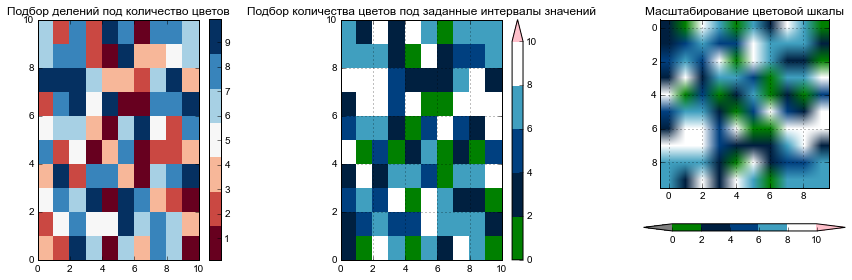

In [2]:
# Пример 13.1

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

a = np.random.random(100)*10.
a = a.reshape(10,10)

fig = plt.figure(figsize=(12,4))

N = 7
bounds = np.linspace(np.min(a), np.max(a), N+1)
print(bounds)
cmap = mpl.cm.get_cmap('RdBu', N) 

ax = fig.add_subplot(131)
cs = ax.pcolor(a, cmap=cmap) # вызываем метод pcolor. Вводим пользовательскую раскраску через cmap
print(u'Тип CS: %s' % type(cs))
cbar = fig.colorbar(cs, ax=ax) # рисуем шкалу colorbar для изображения cs. В качестве черточек шкалы указываем bounds. 
print(u'Тип CBAR: %s' % type(cbar))
# ticks=bounds
ax.set_title(u'Подбор делений под количество цветов')

# ---------------------------------------------------

ax2 = fig.add_subplot(132)
bounds = [0.0, 2.0, 4.0, 6.0, 8.0, 10.0]
cmap = mpl.cm.get_cmap('ocean', len(bounds)-1)
cmap.set_over('red')
cmap.set_under('grey')
cs = ax2.pcolor(a, cmap=cmap, vmin=bounds[0], vmax=bounds[-1]) # Ставим границы для шкалы vmin и vmax.
cbar = fig.colorbar(cs, ax=ax2, ticks=bounds, extend='max', extendfrac=0.1)
ax2.set_title(u'Подбор количества цветов под заданные интервалы значений')
ax2.grid(True)
cmap.set_over('pink')

# ---------------------------------------------------

ax3 = fig.add_subplot(133)
cs = ax3.imshow(a, cmap=cmap,  vmin=bounds[0], vmax=bounds[-1]) # В методе pcolor/pcolormesh/imshow присваиваем пользовательские границы цветов norm
cbar = fig.colorbar(cs, ax=ax3, ticks=bounds, extend='both', extendfrac='auto',
                    orientation='horizontal')
ax3.set_title(u'Масштабирование цветовой шкалы')
ax3.grid(True)

plt.tight_layout()

save('pic_13_1', fmt='png')
save('pic_13_1', fmt='pdf')

plt.show()

### 13.2 Подпись цветовой шкалы

Подпись к шкале осуществляется методом `cbar.set_label()`. Однако, мы помним, что цветовая шкала - это особая область рисования, а значит ей доступны и другие методы для создания подписей.

Положение делений на цветовой шкале subplot 1
[ 0.07979106  1.47394994  2.86810882  4.2622677   5.65642658  7.05058546
  8.44474434  9.83890322]


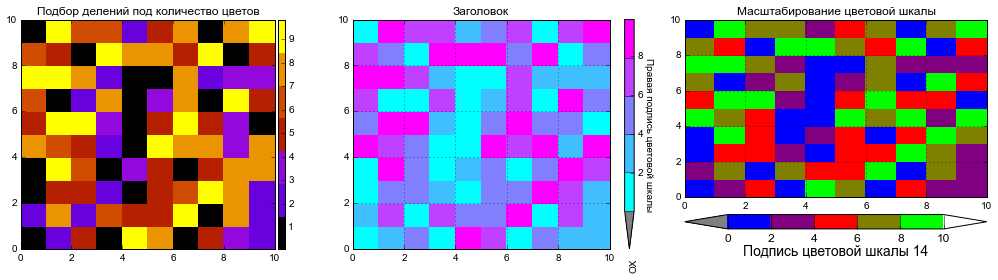

In [3]:
# Пример 13.2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator

a = np.random.random(100)*10.
a = a.reshape(10,10)

fig = plt.figure(figsize=(14,4))

N = 7
bounds = np.linspace(np.min(a), np.max(a), N+1)
print(u'Положение делений на цветовой шкале subplot 1')
print(bounds)
cmap = mpl.cm.get_cmap('gnuplot', N) 

ax = fig.add_subplot(131)

# вызываем метод pcolor. Вводим пользовательскую раскраску через cmap
cs = ax.pcolor(a, cmap=cmap, vmin=bounds[0], vmax=bounds[-1])
cbar = fig.colorbar(cs, ax=ax, pad=0.01, aspect=30) # pad=0.01 приближает шкалу близко к графику
ax.set_title(u'Подбор делений под количество цветов')
# ---------------------------------------------------

bounds = [0.0, 2.0, 4.0, 6.0, 8.0, 10.0]

ax2 = fig.add_subplot(132)
formatter2 = MultipleLocator(2)
cmap = mpl.cm.get_cmap('cool', len(bounds)-1)
cmap.set_over('red')
cmap.set_under('grey')
cs = ax2.pcolor(a, cmap=cmap) # Ставим границы для шкалы vmin и vmax.
cbar = fig.colorbar(cs, ax=ax2, ticks=formatter2, fraction=0.1, drawedges=True,
                    extend='min', extendfrac='auto')
# методы ax.set_xlabel() и ax.set_ylabel()
cbar.ax.set_ylabel(u'Правая подпись цветовой шкалы', rotation=270, labelpad=10)
cbar.ax.set_xlabel(u'OX', labelpad=10, rotation=90, position=(1.,0.))
ax2.set_title(u'Заголовок')
ax2.grid(True)


ax3 = fig.add_subplot(133)
cmap = mpl.cm.get_cmap('brg', len(bounds)-1)
cmap.set_over('white')
cmap.set_under('grey')
cs = ax3.pcolor(a, cmap=cmap,  vmin=bounds[0], vmax=bounds[-1]) # В методе pcolor/pcolormesh/imshow присваиваем пользовательские границы цветов norm
cbar = fig.colorbar(cs, ax=ax3, ticks=bounds, extend='both', extendfrac='auto', pad=0.075,
                    orientation='horizontal', drawedges=True, aspect=15)

ax3.set_title(u'Масштабирование цветовой шкалы')
cbar.set_label(u'Подпись цветовой шкалы 14', fontsize=14, labelpad=0)
cbar.ax.tick_params(labelsize=12)

ax3.grid(True)

plt.tight_layout()

save('pic_13_2', fmt='png')
save('pic_13_2', fmt='pdf')

plt.show()

### 13.3 Положение цветовой шкалы на области рисования

Метод `fig.colorbar()` принимает три необязательных параметра:

+ **`mapable`** - собственно объект, с которым связана цветовая шкала;

+ **`ax`** - родительская область рисования (экземпляр Axes или AxesSubplot), из пространства которой будет выделяться место для расположения цветовой шкалы. Шкала будет создана вне графика-диаграммы.

+ **`cax`** - область рисования в которой будет нарисована цветовая шкала. Шкала будет создана "на графике".

Собственно, третий параметр "cax" позволяет рисовать цветовую шкалу в любом месте соответствующей области рисования. Стоит отметить, что cax в качестве входящих данных берёт экземпляр axes. Чтобы расположить цветовую шкалу в заданной области рисунка, необходимо знать границы соответствующей области рисования ax. Иначе цветовая шкала скорее всего перекроет область, где отображается график или диаграмма. Границы текущей области рисования ax можно узнать при выводе на экран экземпляра axes (print ax). Для автоматизации можно использовать следующий приём:

> `bbox = ax.get_position()`;

> `rect = bbox.bounds`

Здесь rect - это кортеж границ соответсвтующей области рисования ax ([левая граница, нижняя граница, ширина, высота]). Отступив от неё какое-то фиксированное расстояние (в долях от всей ширины-высоты), можно автоматизированно рисовать в нужном месте цветовую шкалу colorbar. Такой метод прямого размещения плохо работает с методом `plt.tight_layout()`, но при тонкой настройке он вряд ли потребуется.

Положение делений на цветовой шкале subplot 1
[ 0.01992804  1.42603898  2.83214991  4.23826085  5.64437179  7.05048272
  8.45659366  9.8627046 ]
Область рисования ax имеет следующие границы
Axes(0.125,0.125;0.352273x0.775)
('Rect:', [0.54772727272727262, 0.94000000000000006, 0.35227272727272729, 0.025])


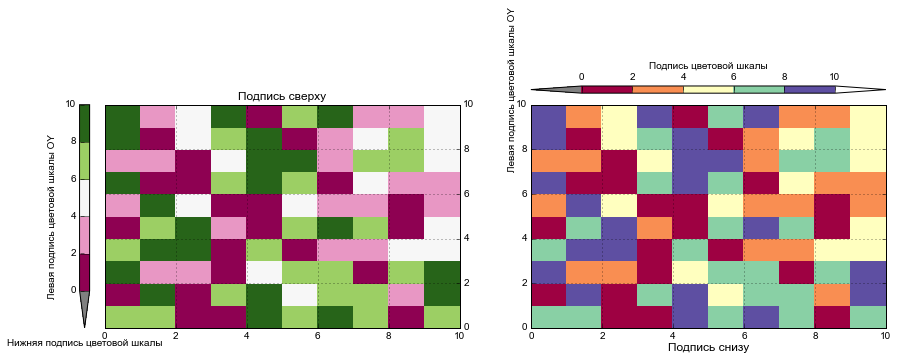

In [4]:
# Пример 13.3

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

a = np.random.random(100)*10.
a = a.reshape(10,10)

fig = plt.figure(1,(14,4))

N = 7
bounds = np.linspace(np.min(a), np.max(a), N+1)
print(u'Положение делений на цветовой шкале subplot 1')
print(bounds)
cmap = mpl.cm.get_cmap('gnuplot', N) 

# ---------------------------------------------------

ax2 = fig.add_subplot(121)
print(u'Область рисования ax имеет следующие границы')
print(ax2)
bbox = ax2.get_position()
rect = list(bbox.bounds)
#rect[0] = rect[0]
rect[0] = rect[0] - 0.025
rect[2] = 0.01
cax = fig.add_axes(rect) 

bounds = [0.0, 2.0, 4.0, 6.0, 8.0, 10.0]
cmap = mpl.cm.get_cmap('PiYG', len(bounds)-1)
cmap.set_over('red')
cmap.set_under('grey')
cs = ax2.pcolor(a, cmap=cmap, vmin=bounds[0], vmax=bounds[-1]) # Ставим границы для шкалы vmin и vmax.
cbar = fig.colorbar(cs, cax=cax, ax=ax2, ticks=bounds, drawedges=True,
                    extend='min', extendfrac='auto')
cbar.ax.set_ylabel(u'Левая подпись цветовой шкалы OY', rotation=90, labelpad=10)
cbar.ax.set_xlabel(u'Нижняя подпись цветовой шкалы', labelpad=10)

ax2.yaxis.set_ticks_position('right')
cbar.ax.yaxis.set_ticks_position('left')
cbar.ax.yaxis.set_label_position('left')
cbar.ax.xaxis.set_label_position('bottom')
ax2.set_title(u'Подпись сверху')
ax2.grid(True)

cmap = mpl.cm.get_cmap('Spectral', len(bounds)-1)
cmap.set_over('white')
cmap.set_under('grey')

# ---------------------------------------------------

ax3 = fig.add_subplot(122)
bbox = ax3.get_position()
rect = list(bbox.bounds)
rect[1] = rect[1] + rect[3] + 0.04
rect[3] = 0.025
print('Rect:', rect)
cax = fig.add_axes(rect)
cs = ax3.pcolor(a, cmap=cmap,  vmin=bounds[0], vmax=bounds[-1]) # В методе pcolor/pcolormesh/imshow присваиваем пользовательские границы цветов norm
cbar = fig.colorbar(cs, ax=ax3, cax=cax, ticks=bounds, extend='both', extendfrac='auto',
                    orientation='horizontal', drawedges=True)

ax3.xaxis.set_label_position('bottom')
ax3.set_title(u'Подпись снизу', position=(0.5, -0.125))
cbar.ax.xaxis.set_label_position('top')
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.set_ylabel(u'Левая подпись цветовой шкалы OY', rotation=90, labelpad=15)
cbar.ax.set_xlabel(u'Подпись цветовой шкалы')

ax3.grid(True)

save('pic_13_3', fmt='png')
save('pic_13_3', fmt='pdf')

plt.show()

### 13.4 Деления цветовой шкалы

Как и для других axes объектов с цветовой шкалой можно работать через методы "set-get". Так как для работы с делениями colorbar доступны методы, аналогичные для axes и axis, то можно управлять положением делений и их подписями на шкале разными методами. 

> Здесь `cbar=fig.colorbar(cs, cax=cax, ax=ax)`

Например, так:

+ `cbar.ax.set_ylabel()`

+ `cbar.ax.set_yticklabels()`

+ `cbar.ax.set_yticks()`

Или воспользоваться методами xaxis/yaxis:

+ `cbar.ax.yaxis.set_ticks_position()`

+ `cbar.ax.yaxis.set_label_position()`

+ `cbar.ax.xaxis.set_ticks_position()`

+ `cbar.ax.xaxis.set_label_position()`

С помощью локатеров и форматтеров:

+ `cbar.ax.xaxis.set_major_locator()`

+ `cbar.ax.xaxis.set_major_formatter()`

+ `cbar.ax.xaxis.set_minor_locator()`

+ `cbar.ax.xaxis.set_minor_formatter()`

+ `cbar.ax.xaxis.set_major_locator()`

+ `cbar.ax.xaxis.set_major_formatter()`

+ `cbar.ax.xaxis.set_minor_locator()`

+ `cbar.ax.xaxis.set_minor_formatter()`

Axes(0.125,0.125;0.352273x0.775)
Subplot 1 bounds: [  0.           1.42857143   2.85714286   4.28571429   5.71428571
   7.14285714   8.57142857  10.        ]
new_yticks [ 0.07142857  0.21428571  0.35714286  0.5         0.64285714  0.78571429
  0.92857143  1.07142857] 8


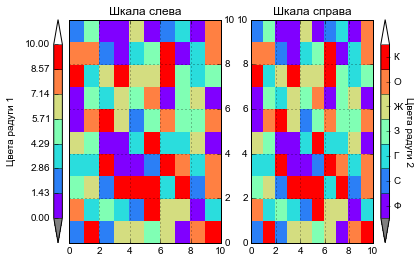

In [5]:
# Пример 13.4

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

a = np.random.random(100)*10.
a = a.reshape(10,10)

fig = plt.figure()

# ------------------------------------------------------

ax2 = fig.add_subplot(121)
print ax2
bbox = ax2.get_position()
rect = list(bbox.bounds)
rect[0] = rect[0] - 0.035
rect[2] = 0.02
cax = fig.add_axes(rect) 

N = 7
bounds = np.linspace(0., 10., N+1)
print 'Subplot 1 bounds:', bounds

cmap = mpl.cm.get_cmap('rainbow', len(bounds)-1)
cmap.set_over('white')
cmap.set_under('grey')

cs = ax2.pcolor(a, cmap=cmap, vmin=bounds[0], vmax=bounds[-1]) # Ставим границы для шкалы vmin и vmax.
cbar = fig.colorbar(cs, cax=cax, ax=ax2, ticks=bounds, drawedges=True,
                    extend='both', extendfrac='auto')
cbar.ax.set_ylabel(u'Цвета радуги 1', rotation=90, labelpad=10)
ax2.yaxis.set_ticks_position('right')
cbar.ax.yaxis.set_label_position('left')
cbar.ax.yaxis.set_ticks_position('left')

ax2.set_title(u'Шкала слева')
ax2.grid(True)

# ---------------------------------------------

ax1 = fig.add_subplot(122)

bounds = np.linspace(0., 10., N+1)
cmap = mpl.cm.get_cmap('rainbow', len(bounds)-1)
cmap.set_over('white')
cmap.set_under('grey')

cs = ax1.pcolor(a, cmap=cmap, vmin=bounds[0], vmax=bounds[-1]) # Ставим границы для шкалы vmin и vmax.
cbar = fig.colorbar(cs, ax=ax1, ticks=bounds, drawedges=True,
                    extend='both', extendfrac='auto')
cbar.ax.set_ylabel(u'Цвета радуги 2', rotation=270, labelpad=10)
cbar_yticks = cbar.ax.get_yticks()
new_yticks = cbar_yticks + (1./((len(bounds)-1)*2))
print 'new_yticks', new_yticks, len(new_yticks)

cbar.set_ticks(10.*new_yticks)
cbar.set_ticklabels([u'Ф', u'С', u'Г', u'З', u'Ж', u'О', u'К', u'Б']) 

ax1.set_title(u'Шкала справа')
ax1.grid(True)

save('pic_13_4', fmt='png')
save('pic_13_4', fmt='pdf')

plt.show()

### 13.5 Особенности в отображении цветовых шкал разными методами

Методы `pcolor`/`pcolormesh`, `imshow` и `contour`/`contourf` немного по-разному отображают цветовую шкалу. В методах `pcolor` и `imshow` по умолчанию отображается "плавная" шкала, переход от цвета к цвету в них постепенный, а в методах изолиний `contour`/`contourf`, наоборот, шкала дискретная с резким изменением цвета при переходе от одного интервала к другому.

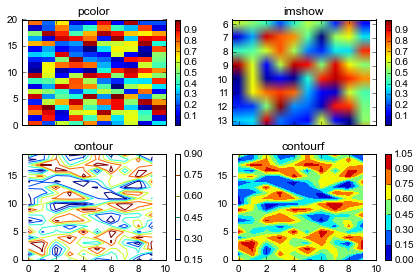

In [6]:
# Пример 13.5

import matplotlib.pyplot as plt
import numpy as np

def m_draw(i):
    '''
    В зависимости от целого i выбирается метод рисования 2D
    '''
    if(i == 0):
        md = ax.pcolor
    elif(i == 1):
        md = ax.imshow
    elif(i == 2):
        md = ax.contour
    elif(i == 3):
        md = ax.contourf
    else:
        md = ax.pcolor

    return md

dat = np.random.random(200).reshape(20,10) # создаём матрицу значений

fig, subs = plt.subplots(nrows=2, ncols=2, sharex=True)
titles = ['pcolor', 'imshow', 'contour', 'contourf']

for i, ax in enumerate(fig.axes):
    new_method = m_draw(i)
    cs = new_method(dat)
    fig.colorbar(cs, ax=ax)
    ax.set_title(titles[i])

plt.tight_layout()

save('pic_13_5', fmt='png')
save('pic_13_5', fmt='pdf')

plt.show()

### 13.6 Цветовая шкала в методе `pcolor()`

Покажем как можно задать количество цветов для шкалы, определить сами цвета и отобразить значения, которые выходят за установленные рамки для метода `pcolor` или `pcolormesh`.

xticks:  [  0.   2.   4.   6.   8.  10.]
yticks:  [  0.   2.   4.   6.   8.  10.]
cmap.N=  5


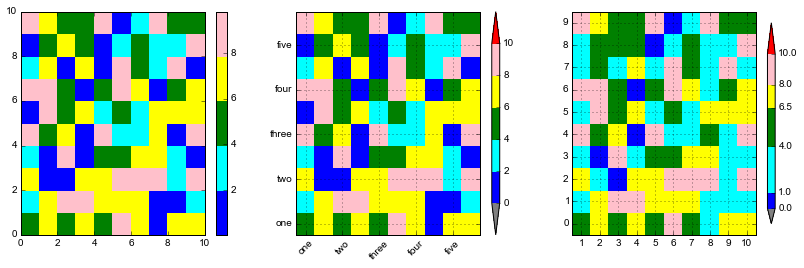

In [7]:
# Пример 13.6

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

a = np.random.random(100)
a = a*10.0
a = a.reshape(10,10)

fig = plt.figure(1,(14,4))


ax = fig.add_subplot(131)

bounds = [0.0, 2.0, 4.0, 6.0, 8.0, 10.0] # список числовых границ. Длина N. Обратите внимание шаг регулярный.
cpool = ['blue','cyan','green','yellow','pink'] # список цветов, которые будут отображены между заданными границами bounds. Длина N-1
cmap = mpl.colors.ListedColormap(cpool, 'indexed') # Задаём дискретную шкалу цветов из списка cpool
cs = ax.pcolor(a, cmap=cmap) # вызываем метод pcolor. Вводим пользовательскую раскраску через cmap
cbar = fig.colorbar(cs, ticks=bounds) # рисуем шкалу colorbar для изображения cs. В качестве черточек шкалы указываем bounds. 

# ---------------------------------------------------

ax2 = fig.add_subplot(132)

bounds = [0.0, 2.0, 4.0, 6.0, 8.0, 10.0] 
cpool = ['blue','cyan','green','yellow','pink'] 
cmap = mpl.colors.ListedColormap(cpool, 'indexed')

cmap.set_over('red') # задаём цвет для значений, выходящих за рамки границы bounds[-1] (сверху шкалы)
cmap.set_under('grey') # задаём цвет для значений, выходящих за рамки границы bounds[0] (снизу шкалы)

cs = ax2.pcolor(a, cmap=cmap, vmin=bounds[0], vmax=bounds[-1]) # Ставим границы для шкалы vmin и vmax.
cbar = fig.colorbar(cs, ticks=bounds, 
                    extend='both', extendfrac='auto') # Добавим треугольные индикаторы, которые отражают превышение 
#                                                       заданных vmin и vmax 
kx = ax2.get_xticks() # Передаём в kx значения черточек по оси OX xticks
print 'xticks: ',kx
xlabel = ['one','two','three','four','five','six'] # список подписей
ax2.set_xticks(kx+0.5) # Смещаем xticks, чтобы они были по центру "пикселей" метода pcolor
ax2.set_xticklabels(xlabel, rotation=45) # Подписываем пользовательскими значениями черточки оси OX и поворачиваем их на 45 градусов
ax2.set_xlim(bounds[0],bounds[-1]) # Ставим ограничения на область изменения оси OX (иначе будут белые полосы по краям)

# Аналогично для оси OY
ky = ax2.get_yticks()
print 'yticks: ',ky
ax2.set_yticks(ky+0.5)
ax2.set_ylim(bounds[0],bounds[-1])
ax2.set_yticklabels(xlabel)

# Рисуем вспомогательную сетку основных черточек xticks-yticks
ax2.grid(True)

'''
Область 3
'''

ax3 = fig.add_subplot(133)

bounds = [0.0, 1.0, 4.0, 6.5, 8.0, 10.0] # Обратите внимание шаг НЕрегулярный.
cpool = ['blue','cyan','green','yellow','pink'] # список цветов, которые будут отображены между заданными границами bounds. Длина N-1
cmap = mpl.colors.ListedColormap(cpool, 'indexed')
cmap.set_over('red')
cmap.set_under('grey') 
norm = mpl.colors.BoundaryNorm(bounds, cmap.N) # Ставим границы для цветовых отрезков шкалы
# cmap.N показывает число цветов-отрезков(прямоугольных)
print 'cmap.N= ',cmap.N

cs = ax3.pcolor(a, cmap=cmap, norm=norm) # В методе pcolor/pcolormesh/imshow присваиваем пользовательские границы цветов norm
cbar = fig.colorbar(cs, ticks=bounds, 
                    extend='both', extendfrac='auto',
                    spacing ='proportional', shrink = 0.9) # Т.к. список bounds имеет неравномерный шаг, то ставим 
# spacing='proportional', а не 'uniform', то есть цветовые отрезки будут пропорциональны заданым bounds, а не одинаковыми.
# shrink позволяет пропорционально изменить шкалу от исходной величины: 0.9 уменьшит шкалу, а 1.2 - увеличит.

# В качестве подписей можно использовать любые значения. Пусть по оси OX это будут значения от 1 до 10
kx = np.arange(0,10) # 0 <=    kx  <= 9
xlabel = kx + 1      # 1 <= xlabel <= 10
ax3.set_xticks(kx+0.5)
ax3.set_xticklabels(xlabel)

# А по оси OY будут значения от 0 до 9, как более принято в Python =)
ax3.set_yticks(kx+0.5)
ax3.set_yticklabels(kx)
ax3.grid(True)

save('pic_13_6', fmt='png')
save('pic_13_6', fmt='pdf')

plt.show()

### 13.7 Цветовая шкала для метода `сontourf()`

Для методов изолиний настройка цветовой шкалы происходит немного по-другому. Так как рисуются изолинии, то необходимо определить интервалы для их проведения. Шаг может быть равномерным (через 4 гПа, например), так и неравномерным. Деления, формирующие интервалы, задаются через параметр `level` метода `contourf()`.

('New norm:', <matplotlib.colors.BoundaryNorm object at 0x000000000DFC1DD8>)
('Number of colors in discrete colormap:', 5)


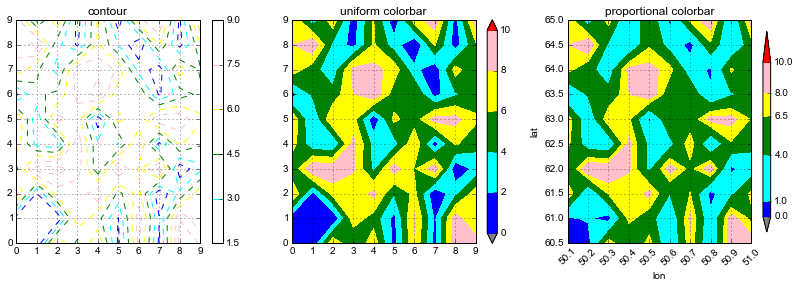

In [8]:
# Пример 13.7

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Создаём массив, который будем отображать
a = np.random.random(100)
a = a*10.0
a = a.reshape(10,10)

cpool = ['blue','cyan','green','yellow','pink']
cmap = mpl.colors.ListedColormap(cpool) # Задаём дискретную шкалу цветов из списка cpool
cmap.set_over('red') # задаём цвет для значений, выходящих за рамки границы levels[-1] (сверху шкалы)
cmap.set_under('grey') # задаём цвет для значений, выходящих за рамки границы levels[0] (снизу шкалы)

# Задаём список границ изолиний. Причём значения попадают в интервал z1 < z <= z2

levels = np.linspace(0., 10., len(cpool)+1) 

fig = plt.figure(figsize=(14,4))

ax1 = fig.add_subplot(131) # Первая ось
cs = ax1.contour(a, cmap=cmap, linestyles='dashed') # вызываем метод изолиний contour. Вводим пользовательскую раскраску через cmap.
cbar = fig.colorbar(cs, ax=ax1) # рисуем шкалу colorbar для изображения cs.
ax1.grid(True)
ax1.set_title('contour')
# -----------------------------------------------------------------

ax2 = fig.add_subplot(132)

cs = ax2.contourf(a, levels, cmap=cmap, extend='both') # Задаём границы для изолиний levels.
# Также для метода contour и contourf треугольные индикаторы, которые отражают превышение заданных 
# границ levels указываются в самом методе contour. 
cbar = fig.colorbar(cs, ax=ax2, spacing='uniform') # Устанавливаем черточки шкалы согласно спискам уровней изолиний levels.
# Задаём равномерное распределение цветовых сегментов шкалы.
ax2.grid(True)
ax2.set_title('uniform colorbar')
# -----------------------------------------------------------------

ax3 = fig.add_subplot(133)

# Обратите внимание шаг НЕрегулярный.
levels = [0.0, 1.0, 4.0, 6.5, 8.0, 10.0]
# len(cpool) = cmap.N
norm = mpl.colors.BoundaryNorm(levels, cmap.N) # Ставим границы для цветовых отрезков шкалы 
print('New norm:', norm)
print('Number of colors in discrete colormap:', cmap.N)

cs = ax3.contourf(a, levels, cmap=cmap, norm=norm, extend='both') 
cbar = fig.colorbar(cs, ax=ax3, spacing='proportional',   # сделаем цветовые сегменты шкалы пропоциональными границам levels
                    extendfrac='auto',   # изменим длину треугольных индикаторов
                    shrink=0.9,   # уменьшим размер шкалы
                    orientation='vertical') # можно изменить положение шкалы на горизонтальное (horizontal)

# В качестве подписей можно использовать любые значения. 
xlabel = np.arange(50.1, 51.1, 0.1) # Сделаем подписи произвольных долгот 
ax3.set_xticklabels(xlabel, rotation=45)
ax3.set_xlabel('lon')

ylabel = np.arange(60.5,65.5,0.5) # Сделаем подписи произвольных широт
ax3.set_yticklabels(ylabel)
ax3.set_ylabel('lat')

ax3.grid(True)
ax3.set_title('proportional colorbar')

save('pic_13_7', fmt='png')
save('pic_13_7', fmt='pdf')

plt.show()

### 13.8 Цветовая шкала для метода `scatter()`

Нерегулярно расположённые в пространстве данные можно изобразить маркерами с помощью метода `scatter()` с добавлением цвета и/или размера в качестве третьей координаты. Значения поля нужно указать в качестве массива или списка параметру цвета маркеров "c" и/или параметру размера "s". Тип цветовой палитры задаётся параметром cmap (см. главу "Цвет").

Min y 0.0
Max y 21.3


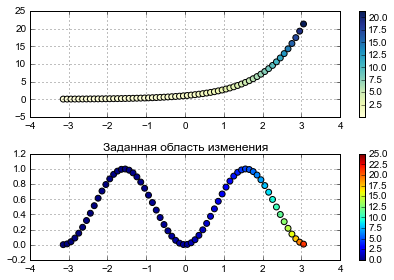

In [9]:
# Пример 13.8.1 

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()

x = np.arange(-np.pi, np.pi, 0.1)
y = np.exp(x)
z = np.sin(x)**2

ax1 = fig.add_subplot(211)
cmap = plt.cm.get_cmap('YlGnBu')
sc = ax1.scatter(x, y, c=y, s=35, cmap=cmap)
plt.colorbar(sc, ax=ax1)
ax1.grid(True)

ax2 = fig.add_subplot(212)
cmap = plt.cm.get_cmap('jet')
sc = ax2.scatter(x, z, c=y, vmin=0., vmax=25., s=35, cmap=cmap)
fig.colorbar(sc, ax=ax2)
ax2.grid(True)
ax2.set_title(u'Заданная область изменения')
print 'Min y %.1f' % np.min(y)
print 'Max y %.1f' % np.max(y)

plt.tight_layout()

save('pic_13_8_1', fmt='png')
save('pic_13_8_1', fmt='pdf')

plt.show()

Min y 0.0
Max y 1.0


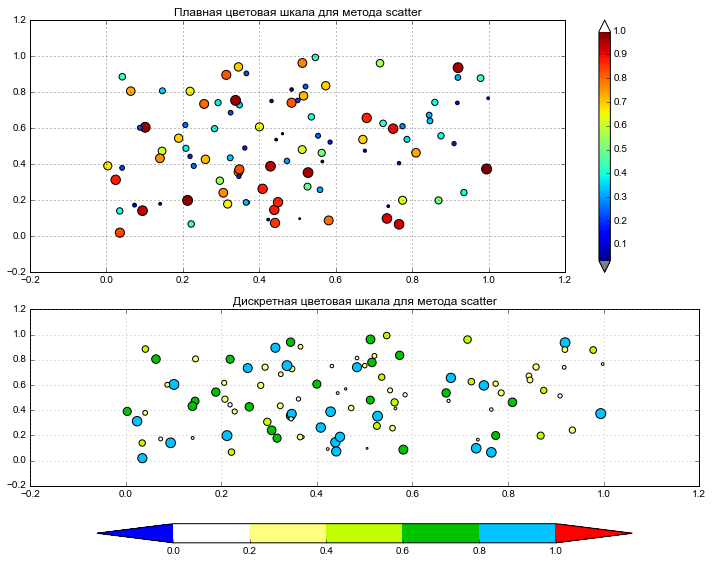

In [10]:
# Пример 13.8.2

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(1, (10, 8))

N = 100
x, y = np.random.rand(2, N)
z = np.random.rand(N)

ax1 = fig.add_subplot(211)
cmap = plt.cm.get_cmap('jet')
cmap.set_over('w')
cmap.set_under('grey')

sc = ax1.scatter(x, y, c=z, s=z*100, cmap=cmap)
cbar = fig.colorbar(sc, ax=ax1, extend='both')
ax1.grid(True)
ax1.set_title(u'Плавная цветовая шкала для метода scatter')

ax2 = fig.add_subplot(212)

#cpool = ['cyan', 'green', 'yellow', 'orange', 'red']
cpool = ['#ffffff', '#ffff7f', '#c0ff00', '#00c300', '#00c3ff']
cmap = mpl.colors.ListedColormap(cpool, 'indexed')

cmap.set_over('r')
cmap.set_under('b')

ticks = np.linspace(0., 1., cmap.N + 1)
norm = mpl.colors.BoundaryNorm(ticks, cmap.N) 

sc = ax2.scatter(x, y, c=z, s=100*z, cmap=cmap, norm=norm)
cbar = fig.colorbar(sc, ax=ax2, ticks=ticks, norm=norm, extend='both',
                    extendfrac='auto', shrink=0.8,
                    orientation='horizontal')
cbar.set_ticks(ticks)
cbar.set_ticklabels(ticks)

ax2.set_title(u'Дискретная цветовая шкала для метода scatter')
ax2.grid(True, color='grey')
print 'Min y %.1f' % np.min(y)
print 'Max y %.1f' % np.max(y)

plt.tight_layout()

save('pic_13_8_2', fmt='png')
save('pic_13_8_2', fmt='pdf')

plt.show()

Автор: Шабанов Павел Александрович

E-mail: pa.shabanov@gmail.com

## Научная графика в Python

### Оглавление

+ [Глава 1 Библиотека matplotlib. Pyplot](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 1 Pyplot.ipynb)

+ [Глава 2 Основные графические команды](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 2 Main graphical commands.ipynb)

+ [Глава 3 Работа с текстом и шрифтами](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 3 Text and Fonts.ipynb)

+ [Глава 4 Цвет и цветовая палитра](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 4 Color.ipynb)

**Часть II Структура рисунка в matplotlib**

+ [Глава 5 Рисунок](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 5 Figure container.ipynb)

+ [Глава 6 Область рисования](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 6 Axes container.ipynb)

+ [Глава 7 Мультиоконные рисунки](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 7 Subplots.ipynb)

+ [Глава 8 Координатные оси](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 8 Axis container.ipynb)

+ [Глава 9 Деления координатных осей](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 9 Ticks container.ipynb)

**Часть III Специальные элементы рисунка в matplotlib**

+ [Глава 10 Особенности координатных осей](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 10 Twinx and log scale.ipynb)

+ [Глава 11 Графики в полярной системе координат](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 11 Polar plots.ipynb) 

+ [Глава 12 Легенда](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 12 Legends.ipynb)

> + [Глава 13 Цветовая шкала](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 13 Colorbar.ipynb)